In [35]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import IPython
import sklearn
import mglearn
import seaborn as sn

from pandas import read_csv

traindata = read_csv("train.csv")
testdata = read_csv("test.csv")

In [36]:
# Data info

print("Keys: {}".format(traindata.keys()))
#print("Name: {}".format(traindata['Fare'][:5]))
#print("Name: {}".format(traindata['SibSp'][:5]))
#print("{}".format(traindata))

traindf = pd.DataFrame(traindata) 
traindf.head()

Keys: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
# Transform sex and embarked to integer
traindf['Sex']=pd.factorize(traindf['Sex'])[0] # F=0 M=1
traindf['Embarked']=pd.factorize(traindf['Embarked'])[0] # C=0 Q=1 S=2
traindf.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


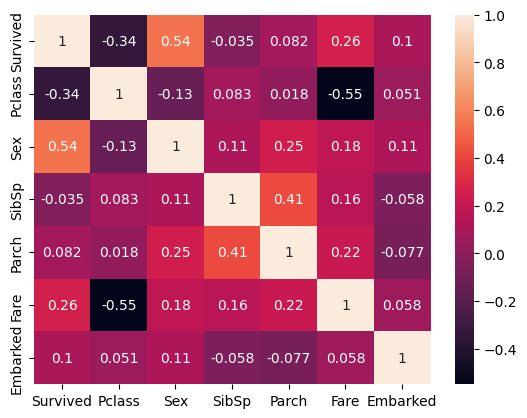

In [38]:
# Remove name, cabin and ticket to build a correlation table
traindf = traindf.drop(columns=["PassengerId", "Name", "Ticket", "Cabin", "Age"])
sn.heatmap(traindf.corr(),
           annot=True)
plt.show()

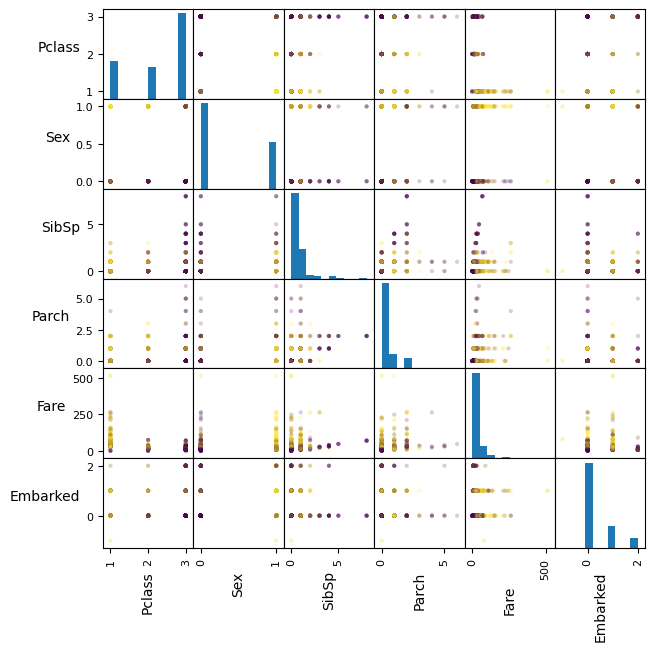

In [39]:
# Pair plotting using 'Survived' to color
tsm = pd.plotting.scatter_matrix(traindf.drop(columns=["Survived"]), 
                                c=traindata['Survived'],
                                figsize=(7,7),
                                alpha=0.2,
                                range_padding=0.2) # transparency
for ax in tsm.flatten(): #rotate the labels so they don't overlap
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

# For some reason, does not work with the 'Age' paramether

In [40]:
# test with kneighbors (probably worst algorithm existent for this)
from sklearn.neighbors import KNeighborsClassifier

print(traindf.drop(columns=["Survived"]).shape, traindf["Survived"].shape)
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(traindf.drop(columns=["Survived"]), traindf["Survived"])

(891, 6) (891,)


/home/aluno/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/aluno/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/aluno/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/aluno/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sparse

KNeighborsClassifier(n_neighbors=1)

In [41]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
 iris_dataset['target_names'][prediction]))

X_new.shape: (1, 4)


/home/aluno/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 4 features, but KNeighborsClassifier is expecting 6 features as input.